# Mc_Donalds_Case_Study

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction import DictVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import mutual_info_classif

In [2]:
# Load the dataset
mcdonalds = pd.read_csv('Dataset\mcdonalds.csv')


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\santh\AppData\Local\Temp\ipykernel_42304\2417318718.py:2: SyntaxWarning: invalid escape sequence '\m'
  mcdonalds = pd.read_csv('Dataset\mcdonalds.csv')


In [3]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
# Explore the dataset
print("Column names:")
print(mcdonalds.columns)
print("\nDataset dimensions:")
print(mcdonalds.shape)
print("\nFirst 3 rows of the dataset:")
print(mcdonalds.head(3))

Column names:
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

Dataset dimensions:
(1453, 15)

First 3 rows of the dataset:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


## PCA

In [5]:
# Prepare data for PCA
categorical_cols = mcdonalds.select_dtypes(include=['object']).columns
numerical_cols = mcdonalds.select_dtypes(include=[np.number]).columns


In [6]:
# Encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)
X_preprocessed = preprocessor.fit_transform(mcdonalds)

In [7]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_preprocessed)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Summary of PCA
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained variance ratio:")
print(explained_variance_ratio)


Explained variance ratio:
[1.61115670e-01 8.36352465e-02 7.12044454e-02 5.43288871e-02
 5.27303635e-02 4.62873521e-02 4.09507049e-02 3.86446284e-02
 3.29622026e-02 3.15865669e-02 2.98234443e-02 2.84299213e-02
 2.80696262e-02 2.72044063e-02 2.66487811e-02 2.63139353e-02
 2.54096871e-02 2.49506934e-02 2.44837454e-02 2.37619772e-02
 2.32322407e-02 2.17908990e-02 1.78451271e-02 1.50115334e-02
 1.34323460e-02 1.25128130e-02 1.17293409e-02 5.90341450e-03
 2.97109318e-17 1.52263311e-17 1.23243429e-17 1.10885173e-17
 5.99606044e-18 2.38204127e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [8]:
# Print PCA components
print("\nPCA components:")
print(pca.components_)


PCA components:
[[ 2.87889335e-01 -2.87889335e-01  2.02015709e-01 ... -4.64237616e-02
   4.64237616e-02  6.12131875e-02]
 [ 1.75844455e-01 -1.75844455e-01 -4.61075926e-02 ...  1.37830869e-01
  -1.37830869e-01  1.16160137e-01]
 [ 9.49854879e-02 -9.49854879e-02  1.86676961e-01 ... -5.66626498e-02
   5.66626498e-02  2.28906833e-01]
 ...
 [-1.16250732e-04 -1.16250732e-04  4.66669159e-02 ...  3.67542194e-02
   3.67542194e-02 -3.35492810e-17]
 [-2.91234285e-04 -2.91234285e-04  1.00670250e-01 ...  6.75583817e-01
   6.75583817e-01 -1.10615727e-16]
 [ 7.07008238e-01  7.07008238e-01 -5.38450490e-03 ...  3.57292145e-03
   3.57292145e-03  1.24900090e-16]]


In [9]:
# Display explained variance ratio and components with 1 decimal precision
np.set_printoptions(precision=1)
print("\nExplained variance ratio (1 decimal):")
print(pca.explained_variance_ratio_)

print("\nPCA components (1 decimal):")
print(pca.components_)


Explained variance ratio (1 decimal):
[1.6e-01 8.4e-02 7.1e-02 5.4e-02 5.3e-02 4.6e-02 4.1e-02 3.9e-02 3.3e-02
 3.2e-02 3.0e-02 2.8e-02 2.8e-02 2.7e-02 2.7e-02 2.6e-02 2.5e-02 2.5e-02
 2.4e-02 2.4e-02 2.3e-02 2.2e-02 1.8e-02 1.5e-02 1.3e-02 1.3e-02 1.2e-02
 5.9e-03 3.0e-17 1.5e-17 1.2e-17 1.1e-17 6.0e-18 2.4e-18 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]

PCA components (1 decimal):
[[ 2.9e-01 -2.9e-01  2.0e-01 ... -4.6e-02  4.6e-02  6.1e-02]
 [ 1.8e-01 -1.8e-01 -4.6e-02 ...  1.4e-01 -1.4e-01  1.2e-01]
 [ 9.5e-02 -9.5e-02  1.9e-01 ... -5.7e-02  5.7e-02  2.3e-01]
 ...
 [-1.2e-04 -1.2e-04  4.7e-02 ...  3.7e-02  3.7e-02 -3.4e-17]
 [-2.9e-04 -2.9e-04  1.0e-01 ...  6.8e-01  6.8e-01 -1.1e-16]
 [ 7.1e-01  7.1e-01 -5.4e-03 ...  3.6e-03  3.6e-03  1.2e-16]]


## Clustering with K-Means

In [10]:
# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X_scaled)
clusters_kmeans = kmeans.labels_


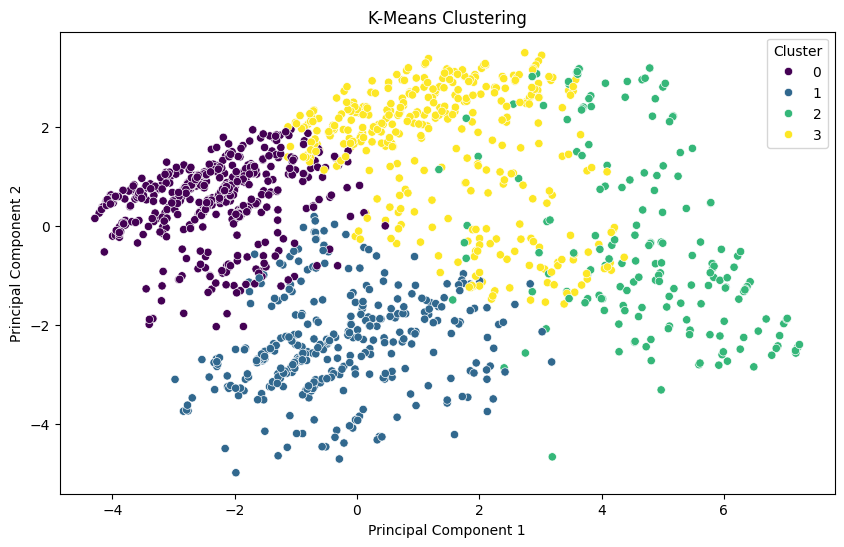

In [11]:
# Plot the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmeans, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## Bootstrapping and Model Comparison

In [12]:
# Bootstrapping K-Means
from sklearn.utils import resample

In [13]:
# Function to compute Rand index
def compute_rand_index(labels_true, labels_pred):
    return adjusted_rand_score(labels_true, labels_pred)

In [14]:
# Bootstrapping
n_bootstrap = 100
rand_indices = []

for _ in range(n_bootstrap):
    X_resampled, y_resampled = resample(X_scaled, clusters_kmeans, random_state=1234)
    kmeans_resampled = KMeans(n_clusters=4, random_state=1234).fit(X_resampled)
    rand_index = compute_rand_index(clusters_kmeans, kmeans_resampled.labels_)
    rand_indices.append(rand_index)

## Regression Analysis with FlexMix Equivalent

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [16]:
# Prepare data for regression
X_reg = mcdonalds.drop(columns=['Like'])
y_reg = mcdonalds['Like']

In [17]:
# Encoding categorical features
X_reg_encoded = pd.get_dummies(X_reg)

# Fit logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=1234)
log_reg.fit(X_reg_encoded, y_reg)

# Get coefficients
print("\nLogistic Regression Coefficients:")
print(pd.Series(log_reg.coef_[0], index=X_reg_encoded.columns))

# Compute log loss
y_pred_proba = log_reg.predict_proba(X_reg_encoded)
log_loss_val = log_loss(y_reg, y_pred_proba)
print("\nLog Loss:", log_loss_val)


Logistic Regression Coefficients:
Age                                     0.000265
yummy_No                                0.207442
yummy_Yes                              -0.184409
convenient_No                          -0.241959
convenient_Yes                          0.264993
spicy_No                                0.133160
spicy_Yes                              -0.110127
fattening_No                           -0.167755
fattening_Yes                           0.190788
greasy_No                               0.026981
greasy_Yes                             -0.003947
fast_No                                 0.028547
fast_Yes                               -0.005513
cheap_No                                0.032733
cheap_Yes                              -0.009700
tasty_No                               -0.267901
tasty_Yes                               0.290934
expensive_No                            0.076540
expensive_Yes                          -0.053507
healthy_No                        

d:\Projects\Basic_ML_Projects\mlproj\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Hierarchical Clustering and Visualization

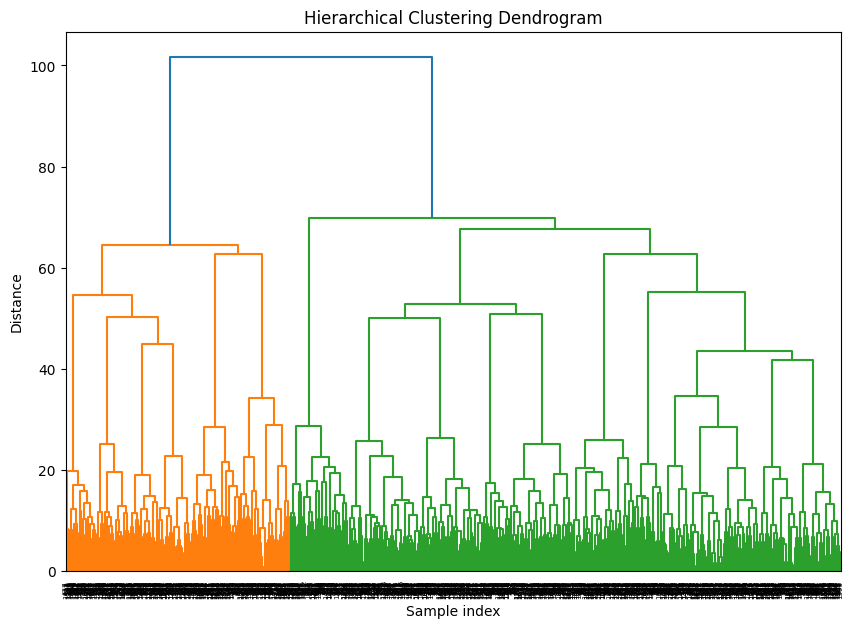

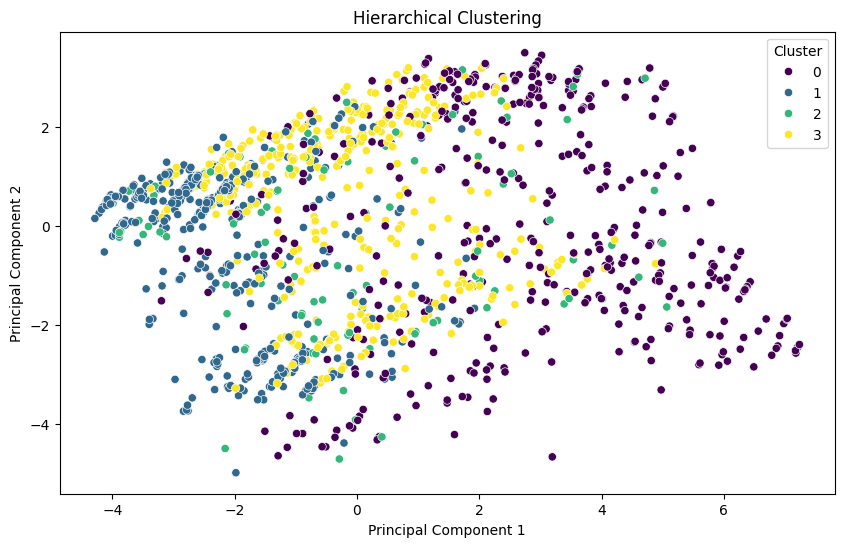

In [18]:
# Hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cluster assignments
agg_clustering = AgglomerativeClustering(n_clusters=4)
clusters_agg = agg_clustering.fit_predict(X_scaled)

# Plot clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_agg, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## Decision Tree and Visualization

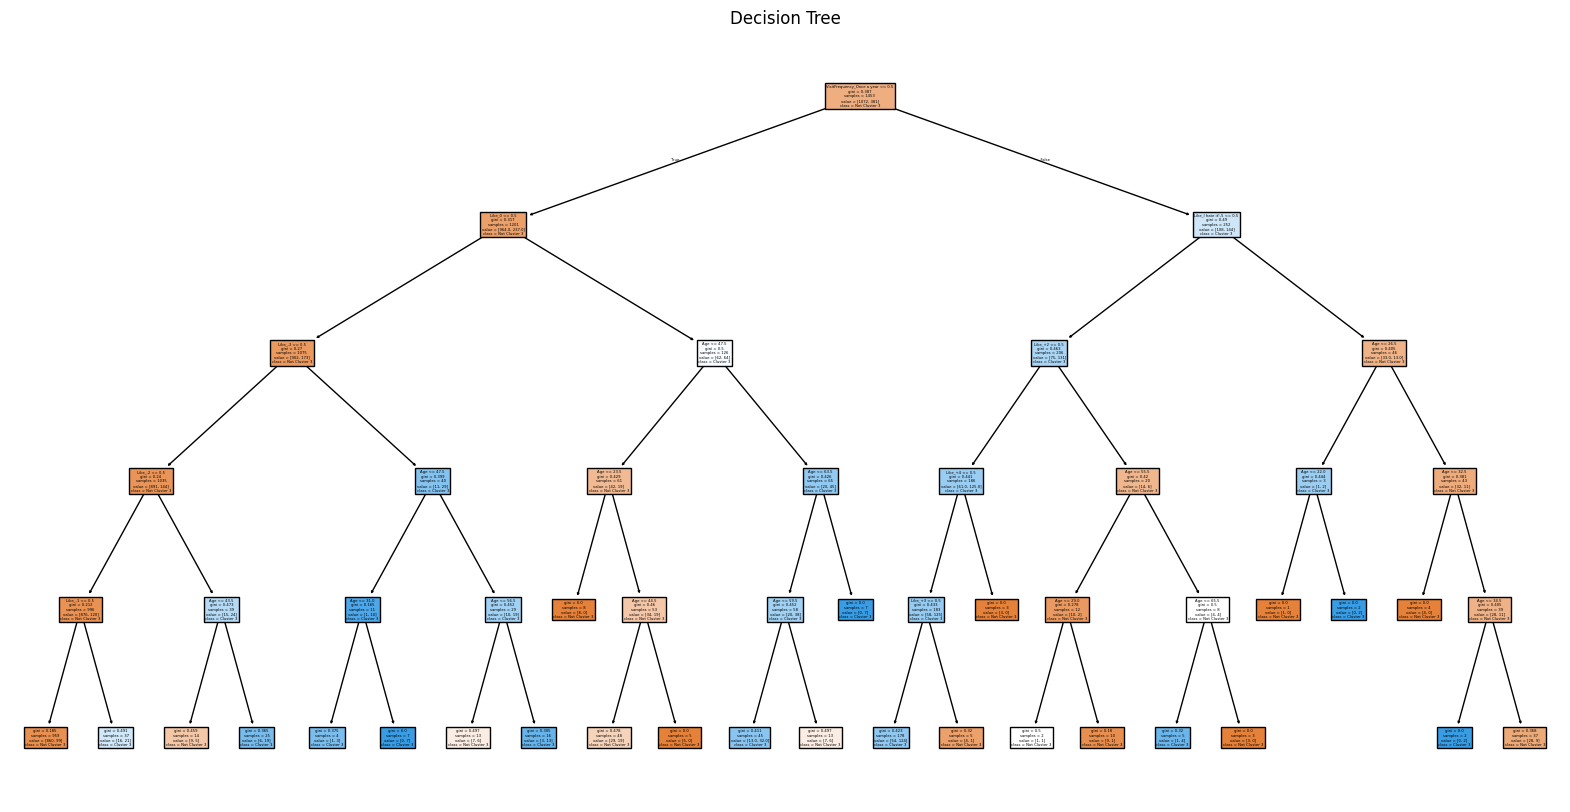

In [19]:
# Prepare data for decision tree
X_tree = mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']]
X_tree = pd.get_dummies(X_tree, drop_first=True)  # One-hot encode categorical data
y_tree = (clusters_kmeans == 3).astype(int)  # Example target variable

# Fit decision tree
tree = DecisionTreeClassifier(random_state=1234,max_depth=5)
tree.fit(X_tree, y_tree)

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_tree.columns, class_names=['Not Cluster 3', 'Cluster 3'], filled=True)
plt.title('Decision Tree')
plt.show()